## Forecast

Have multiple approaches:

Naive - linear regression of product price

Better - multiple linear regression using other metrics forecasts

In [90]:
# Import Libaries
import pandas as pd
import numpy as np
import plotly.express as px
import sqlite3
import dash
from dash import Dash, html, dcc, dash_table
from dash.dependencies import Input, Output

In [91]:
# Connect to database
con = sqlite3.connect('coffee.db')
cur = con.cursor()

# Read all table names. We find four tables: "market", "price", "SND", and "coffee_type"
table_list = [a for a in cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")]
# print(table_list)

# Read table into dataframe, save tables as df for future use
market_df = pd.read_sql_query("SELECT * FROM market", con)
price_df = pd.read_sql_query("SELECT * FROM price", con)
SND_df = pd.read_sql_query("SELECT * FROM SND", con)
coffee_type_df = pd.read_sql_query("SELECT * FROM coffee_type", con)

# Merge the dataframes for ease of analysis. Can do this b/c small dataset, but not recommended for large datasets

df = SND_df.merge(coffee_type_df, on = ['coffee_type_id'])
df = df.merge(market_df, on = ['date'])
df = df.merge(price_df, on = ['date', 'coffee_type_id'])

In [92]:
# Naive
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_copy = df.copy()
df_copy = df_copy[df_copy['coffee_type_id'] == 1]
# DO NOT  include projections
df_copy = df_copy[df_copy['actvsproj_x'] == 'act']

df_copy['date'] = pd.to_datetime(df_copy['date'])
df_copy['date'] = (df_copy['date'] - df_copy['date'].min()).dt.days

c:\Users\huang\anaconda3\envs\coffee\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\huang\anaconda3\envs\coffee\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


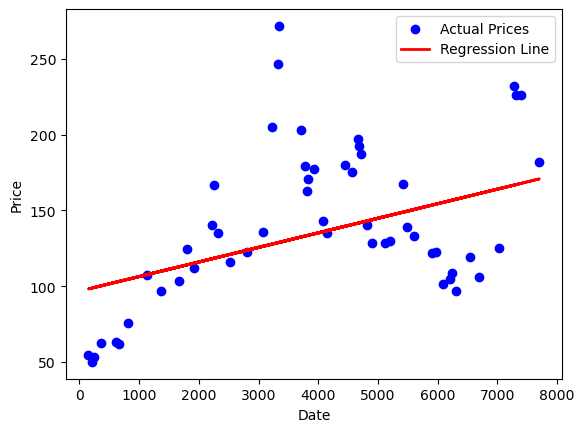

In [93]:
X = df_copy['date'].values.reshape(-1, 1)
y = df_copy['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

import matplotlib.pyplot as plt

# Scatter plot of the actual prices
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')

# Plot the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

# Add labels and a legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()


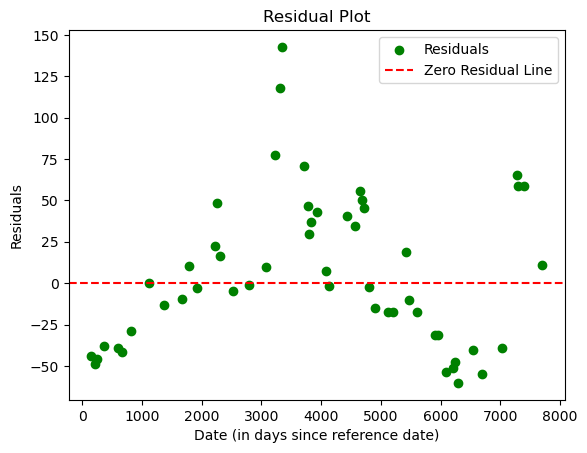

In [94]:
# Calculate the residuals
residuals = y_test - y_pred

# Create a residual plot
plt.scatter(X_test, residuals, color='green', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residual Line')
plt.xlabel('Date (in days since reference date)')
plt.ylabel('Residuals')
plt.legend()
plt.title('Residual Plot')
plt.show()


Simple Lin Reg bad fit, residual plot not evenly distributed

In [95]:
import numpy as np
import statsmodels.api as sm

# Add a constant term (intercept) to the independent variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Display the summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     72.75
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           1.21e-15
Time:                        04:32:47   Log-Likelihood:                -1364.2
No. Observations:                 263   AIC:                             2732.
Df Residuals:                     261   BIC:                             2739.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         96.8531      5.344     18.125      0.0

In [96]:
# MLR 

# Define your features (independent variables) and target (dependent variable)
X = df_copy[['date', 'total_supply', 'total_demand', 'total_consumption', 'total_stock', 'certified_stock']]  # Add all your feature columns
y = df_copy['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [97]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


c:\Users\huang\anaconda3\envs\coffee\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\huang\anaconda3\envs\coffee\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\huang\anaconda3\envs\coffee\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\huang\anaconda3\envs\coffee\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check 

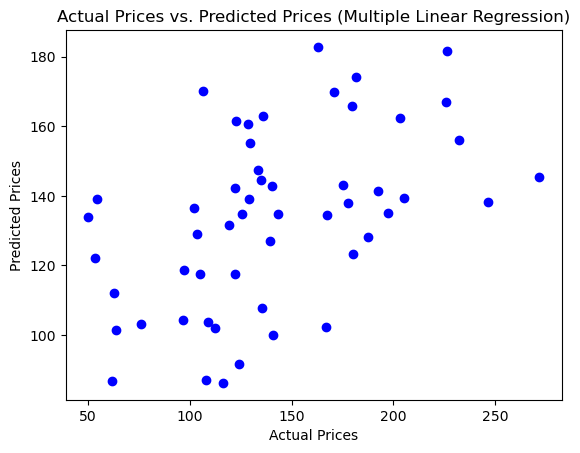

In [98]:
import matplotlib.pyplot as plt

# Create a scatter plot of the actual prices vs. predicted prices
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices (Multiple Linear Regression)')
plt.show()


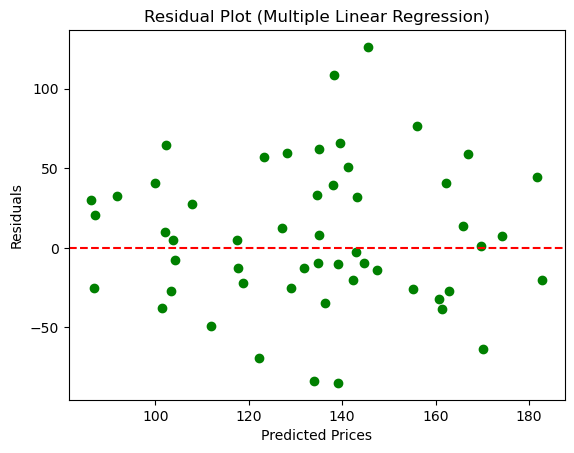

In [99]:
import matplotlib.pyplot as plt

# Calculate the residuals
residuals = y_test - y_pred

# Create a residual plot
plt.scatter(y_pred, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot (Multiple Linear Regression)')
plt.show()


In [100]:
intercept = model.intercept_
coefficients = model.coef_

In [101]:
intercept, coefficients

(374.1299883248926,
 array([ 0.01060958,  0.00055652, -0.01793691, -0.02142244, -0.02233101,
        -0.03601811]))

In [102]:
import numpy as np
import statsmodels.api as sm

# Add a constant term (intercept) to the independent variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Display the summary statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.80
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           1.67e-21
Time:                        04:32:47   Log-Likelihood:                -1340.2
No. Observations:                 263   AIC:                             2694.
Df Residuals:                     256   BIC:                             2719.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               322.4108     58.74

In [103]:
# R-squared only 0.348, can try to do better

import matplotlib.pyplot as plt

# For reference variable names: df_copy[['date', 'total_supply', 'total_demand', 'total_consumption', 'total_stock', 'certified_stock']] 

X.corr()  # Shows relatively high correlations, need to beware of multicollinearity

,const,date,total_supply,total_demand,total_consumption,total_stock,certified_stock
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,NaN,1.000000,0.823772,0.381626,0.722598,0.541546,-0.770500
total_supply,NaN,0.823772,1.000000,-0.109823,0.410159,0.537064,-0.673297
total_demand,NaN,0.381626,-0.109823,1.000000,0.572984,0.113163,-0.219466
total_consumption,NaN,0.722598,0.410159,0.572984,1.000000,0.383028,-0.454520
total_stock,NaN,0.541546,0.537064,0.113163,0.383028,1.000000,-0.385514
certified_stock,NaN,-0.770500,-0.673297,-0.219466,-0.454520,-0.385514,1.000000


array([[<Axes: title={'center': 'const'}>,
        <Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'total_supply'}>],
       [<Axes: title={'center': 'total_demand'}>,
        <Axes: title={'center': 'total_consumption'}>,
        <Axes: title={'center': 'total_stock'}>],
       [<Axes: title={'center': 'certified_stock'}>, <Axes: >, <Axes: >]],
      dtype=object)

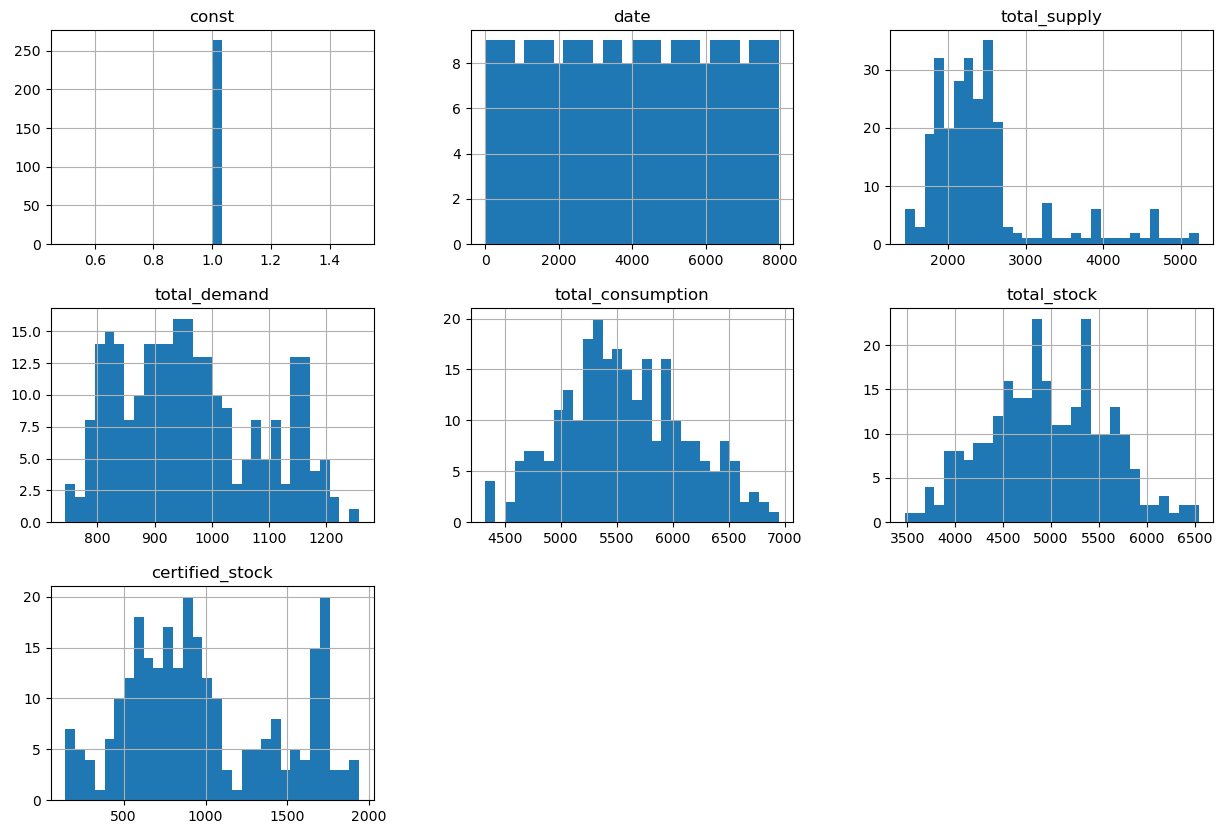

In [104]:
X.hist(bins=30, figsize=(15, 10))

array([[<Axes: title={'center': 'const'}>,
        <Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'total_supply'}>],
       [<Axes: title={'center': 'total_demand'}>,
        <Axes: title={'center': 'total_consumption'}>,
        <Axes: title={'center': 'total_stock'}>],
       [<Axes: title={'center': 'certified_stock'}>, <Axes: >, <Axes: >]],
      dtype=object)

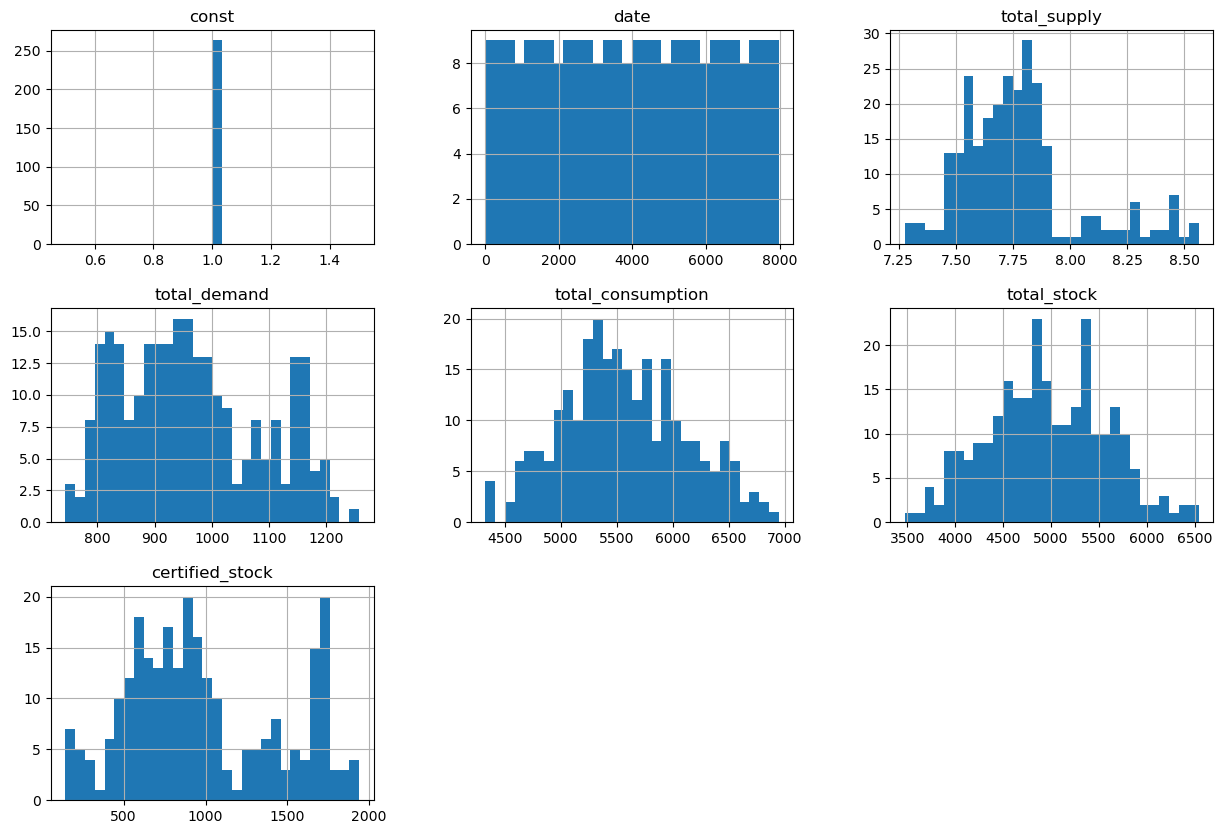

In [105]:
X['total_supply'] = X['total_supply'].apply(np.log)

X.hist(bins=30, figsize=(15, 10))

C:\Users\huang\AppData\Local\Temp\ipykernel_17216\1330767220.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['total_supply'] = X['total_supply'].apply(np.log)
c:\Users\huang\anaconda3\envs\coffee\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\huang\anaconda3\envs\coffee\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\huang\anaconda3\envs\coffee\Lib\site-packag

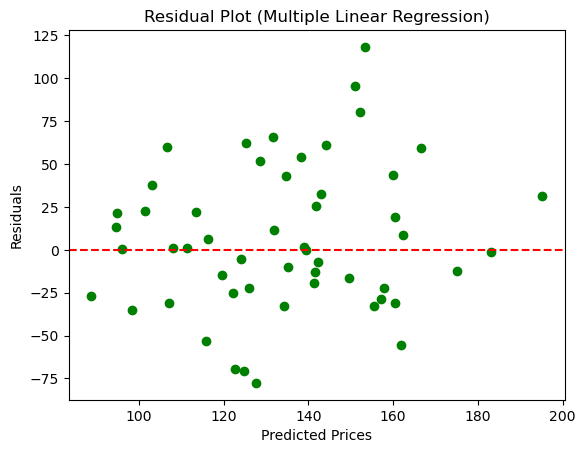

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     27.07
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           6.35e-25
Time:                        04:32:51   Log-Likelihood:                -1331.9
No. Observations:                 263   AIC:                             2678.
Df Residuals:                     256   BIC:                             2703.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -838.5247    289.72

In [106]:
# Supply still skewed but better. trying MLR again. 

X = df_copy[['date', 'total_supply', 'total_demand', 'total_consumption', 'total_stock', 'certified_stock']]  # Add all your feature columns
y = df_copy['price']
X['total_supply'] = X['total_supply'].apply(np.log)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

import matplotlib.pyplot as plt

# Calculate the residuals
residuals = y_test - y_pred

# Create a residual plot
plt.scatter(y_pred, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot (Multiple Linear Regression)')
plt.show()

import numpy as np
import statsmodels.api as sm

# Add a constant term (intercept) to the independent variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model_res = sm.OLS(y, X).fit()

# Display the summary statistics
print(model_res.summary())

In [107]:
# R-squared = 0.413, better than before. now we can use the forecast function to predict the price of coffee in the future

# final forecast
df_test = df.copy()
df_test = df_test[df_test['coffee_type_id'] == 1]
# DO NOT  include projections
df_test = df_test[df_test['actvsproj_x'] == 'proj']

df_test['date'] = pd.to_datetime(df_test['date'])
df_test['date'] = (df_test['date'] - df_test['date'].min()).dt.days

X_new = df_test[['date', 'total_supply', 'total_demand', 'total_consumption', 'total_stock', 'certified_stock']]  # Add all your feature columns

predictions = model.predict(X_new)

predictions

c:\Users\huang\anaconda3\envs\coffee\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\huang\anaconda3\envs\coffee\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\huang\anaconda3\envs\coffee\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([605150.59213477, 612515.13629201, 618586.23428011, 618962.24948419,
       615596.06444255, 612601.02638433, 610199.06012607, 627586.74557624,
       650995.09221228, 671571.81661344, 684322.57271557, 692195.43646318,
       700270.08688992, 708278.47245237, 715651.95326664, 716174.6518343 ,
       712688.12193159, 709427.78967113, 707158.92352517, 720633.45047352,
       739339.23010735, 755496.20351206, 765258.6540799 , 772686.4023763 ,
       781215.33784434, 789345.04534024, 796525.04696597])